# Processamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn.objects as so
from mpl_toolkits.axes_grid1 import host_subplot
import import_ipynb

## POSCOMP

### Dados da Homologação do POSCOMP

In [2]:
dados_homologados = pd.read_csv('dados/homologação_poscomp/dados_homologados.csv')

In [3]:
dados_homologados.head()

INSCRICAO SEXO        CIDADE ESTADO                 CARGO  CÓDIGO  \
0  39401673171-6    M      Arequipa     OU  1-Mestrado/Doutorado       1   
1  39401645886-1    M     Fortaleza     CE  1-Mestrado/Doutorado       1   
2  39401663587-8    M  Porto Alegre     RS  1-Mestrado/Doutorado       1   
3  39401651770-6    M    São Carlos     SP  1-Mestrado/Doutorado       1   
4  39401671273-0    M         Belém     PA  1-Mestrado/Doutorado       1   

        LOCAL DE PROVA   ANO  
0      Arequipa - PERU  2016  
1       Fortaleza - CE  2016  
2  Campina Grande - PB  2016  
3      São Carlos - SP  2016  
4           Belém - PA  2016

<AxesSubplot: xlabel='ANO'>

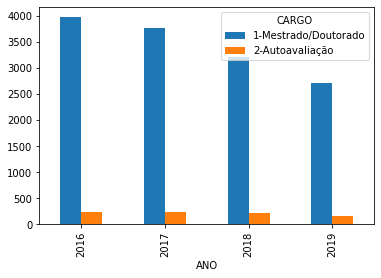

In [4]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('CARGO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<AxesSubplot: xlabel='ANO'>

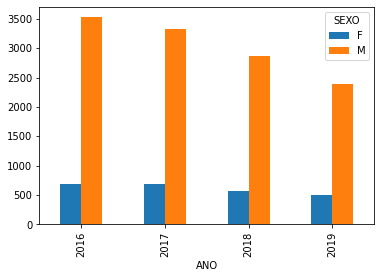

In [5]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<AxesSubplot: >

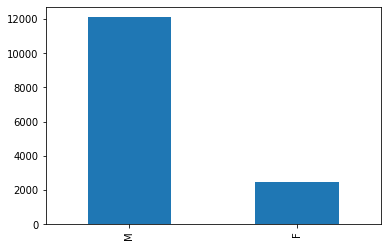

In [6]:
dados_homologados['SEXO'].value_counts().plot.bar()

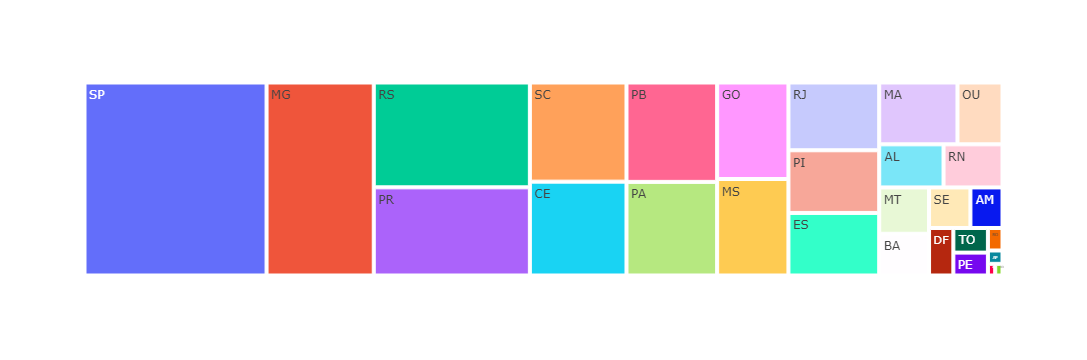

In [7]:
grafico_estado = px.treemap(dados_homologados, path=['ESTADO'])
grafico_estado.show()

In [8]:
# Pegando os dados dos candidatos do Pará
dados_homologadosPA = dados_homologados.loc[dados_homologados['ESTADO'] == 'PA']

<AxesSubplot: xlabel='ANO'>

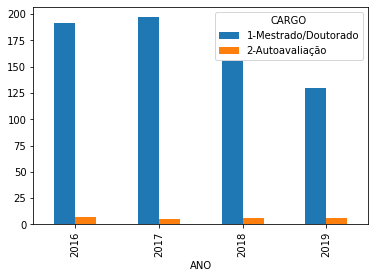

In [9]:
ano = [2016,2017,2018,2019]
dados_homologadosPA.groupby('CARGO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<AxesSubplot: xlabel='ANO'>

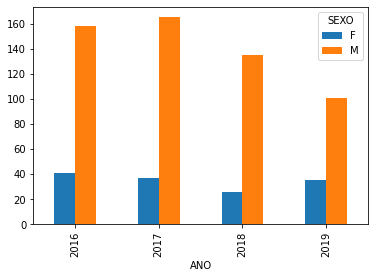

In [10]:
ano = [2016,2017,2018,2019]
dados_homologadosPA.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

In [11]:
dados_homologadosPA = dados_homologadosPA.copy().reset_index(drop=True)

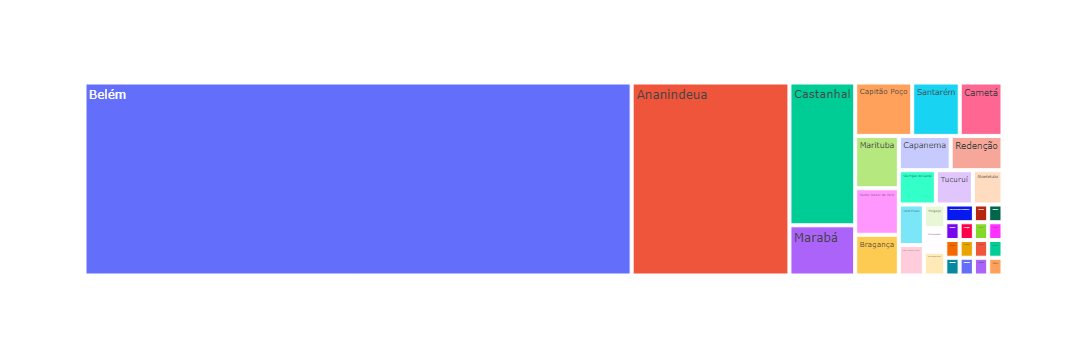

In [12]:
grafico_estado = px.treemap(dados_homologadosPA, path=['CIDADE'])
grafico_estado.show()

In [13]:
dados_homologadosPA

INSCRICAO SEXO                CIDADE ESTADO                 CARGO  \
0    39401671273-0    M                 Belém     PA  1-Mestrado/Doutorado   
1    39401642551-6    M                 Belém     PA  1-Mestrado/Doutorado   
2    39401673519-6    F                 Belém     PA  1-Mestrado/Doutorado   
3    39401659624-9    M  Santa Isabel do Pará     PA  1-Mestrado/Doutorado   
4    39401642623-9    M                 Belém     PA  1-Mestrado/Doutorado   
..             ...  ...                   ...    ...                   ...   
693  51801367385-1    M                 Belém     PA  1-Mestrado/Doutorado   
694  51801394608-5    M            Ananindeua     PA  1-Mestrado/Doutorado   
695  51801362693-0    M            Ananindeua     PA  1-Mestrado/Doutorado   
696  51801390640-2    M                 Belém     PA  1-Mestrado/Doutorado   
697  51801388645-8    M  Santa Isabel do Pará     PA  1-Mestrado/Doutorado   

     CÓDIGO LOCAL DE PROVA   ANO  
0         1     Belém - PA  2016  
1         1     Belém - PA  2016  
2         1     Belém - PA  2016  
3         1     Belém - PA  2016  
4         1     Belém - PA  2016  
..      ...            ...   ...  
693       1       Belém/PA  2019  
694       1       Belém/PA  2019  
695       1       Belém/PA  2019  
696       1       Belém/PA  2019  
697       1       Belém/PA  2019  

[698 rows x 8 columns]

### Dados das Notas do POSCOMP 2016

In [14]:
from textwrap import wrap

In [15]:
dados_notasRespostas = pd.read_csv('dados/notas_poscomp/dados_notasRespostas.csv')

In [16]:
dados_notasRespostas.head()

INSCRICAO  COD CARGO               CARGO  CÓD. ESPECIALIDADE  \
0  39401673171-6          1  Mestrado/Doutorado               250.0   
1  39401645886-1          1  Mestrado/Doutorado               660.0   
2  39401663587-8          1  Mestrado/Doutorado               586.0   
3  39401651770-6          1  Mestrado/Doutorado               283.0   
4  39401671273-0          1  Mestrado/Doutorado               660.0   

                                     ESPECIALIDADE  Matemática Discreta  \
0                          Informática na Educação                  3.0   
1                             Teoria da Computação                  3.0   
2                             TEORIA DA COMPUTAÇÃO                  3.0   
3  Sistemas Distribuídos e Programação Concorrente                  0.0   
4                             Teoria da Computação                  1.0   

   Cálculo Diferencial e Integral  Álgebra Linear  Geometria Analítica  \
0                             3.0             3.0                  1.0   
1                             3.0             2.0                  0.0   
2                             2.0             3.0                  2.0   
3                             1.0             1.0                  1.0   
4                             0.0             1.0                  1.0   

   Análise Combinatória  ...  Arquitetura e Organização de Computadores  \
0                   2.0  ...                                        1.0   
1                   1.0  ...                                        1.0   
2                   2.0  ...                                        1.0   
3                   0.0  ...                                        1.0   
4                   0.0  ...                                        0.0   

   Redes de Computadores  Computação Gráfica  Inteligência Artificial  \
0                    1.0                 0.0                      2.0   
1                    1.0                 0.0                      1.0   
2                    2.0                 0.0                      2.0   
3                    1.0                 0.0                      2.0   
4                    2.0                 0.0                      1.0   

   Engenharia de Software  Sistemas Distribuídos  Compiladores  \
0                     0.0                    3.0           0.0   
1                     3.0                    2.0           1.0   
2                     1.0                    3.0           1.0   
3                     0.0                    2.0           0.0   
4                     1.0                    1.0           1.0   

   Processamento de Imagens  Banco de Dados   ANO  
0                       2.0             2.0  2016  
1                       1.0             1.0  2016  
2                       2.0             1.0  2016  
3                       2.0             1.0  2016  
4                       1.0             0.0  2016  

[5 rows x 31 columns]

In [17]:
dados_candidatosNotasPA = dados_notasRespostas.loc[dados_notasRespostas['INSCRICAO'].
                                                    isin(dados_homologadosPA['INSCRICAO'])].reset_index(drop=True)
dados_candidatosNotas = dados_notasRespostas.loc[~dados_notasRespostas['INSCRICAO'].
                                                    isin(dados_homologadosPA['INSCRICAO'])].reset_index(drop=True)

In [18]:
dados_cand_NotasPA = dados_candidatosNotasPA.copy()

In [19]:
dados_cand_NotasPA = dados_cand_NotasPA.drop(columns=['INSCRICAO', 'COD CARGO', 'CARGO', 'CÓD. ESPECIALIDADE','ANO', 'ESPECIALIDADE'])

#### Gráfico de desempenho por edição dos candidatos Nacional do cargo de mestrado/doutorado

In [20]:
dados_desem_nacional = dados_candidatosNotas.copy().set_index('CARGO')

In [21]:
dados_desem_nacional = dados_desem_nacional.drop(columns=['INSCRICAO', 'COD CARGO', 'CÓD. ESPECIALIDADE','ESPECIALIDADE'])

In [22]:
dados_desem_nacional = dados_desem_nacional.dropna()

In [23]:
grupo_ano_nacional_media = dados_desem_nacional.groupby('ANO').mean()

In [24]:
grupo_ano_nacional = grupo_ano_nacional_media.transpose()

In [25]:
ano = list(grupo_ano_nacional.columns)

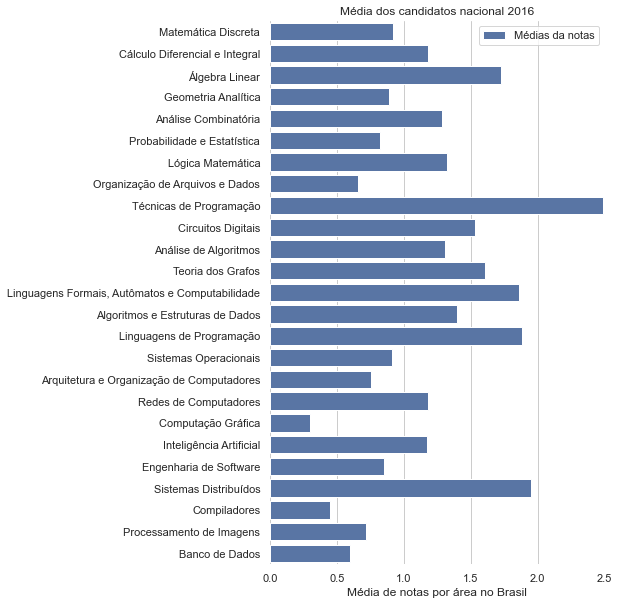

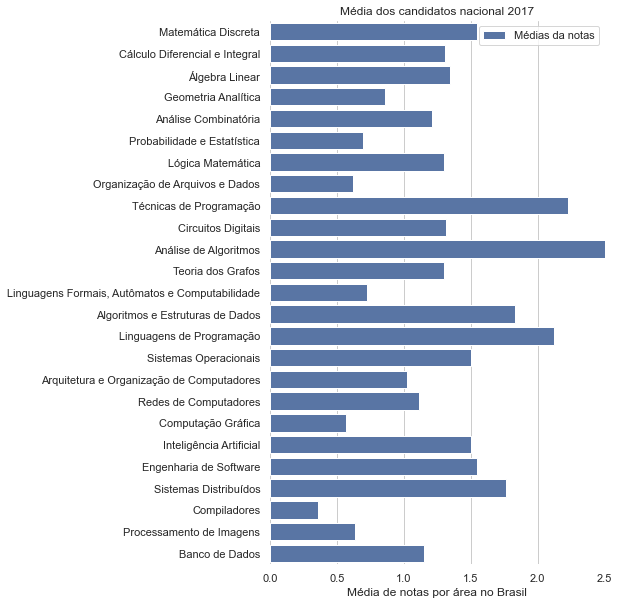

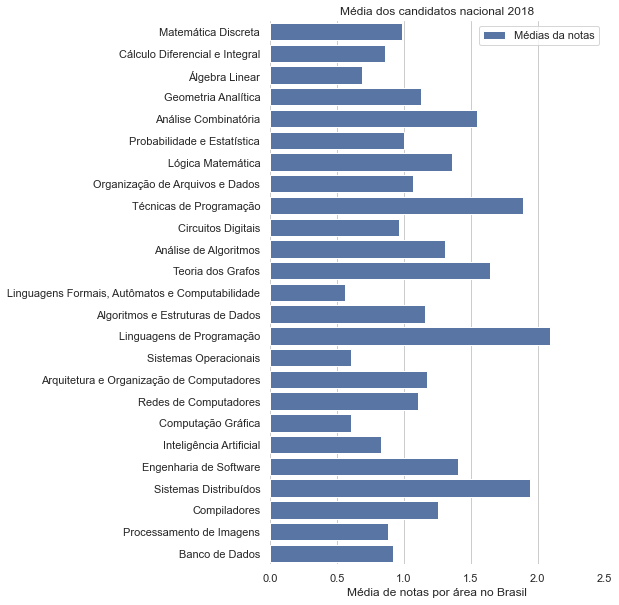

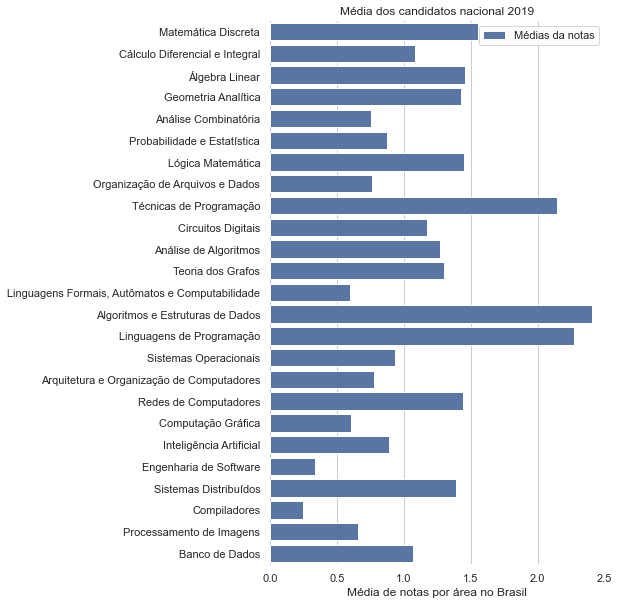

In [26]:
sns.set_theme(style="whitegrid")

for i in ano:
# Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 10))

    # Plot the total crashes
    #sns.set_color_codes("pastel")
    sns.barplot(y=grupo_ano_nacional.index, x=i, data=grupo_ano_nacional,
                label="Médias da notas", color="b")

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="best", frameon=True)
    texto_title = f'Média dos candidatos nacional {i}'
    ax.set_title(texto_title)
    ax.set(xlim=(0, 2.5), ylabel="",
        xlabel="Média de notas por área no Brasil")
    sns.despine(left=True, bottom=True)

#### Gráfico de desempenho por edição dos candidatos  do Estado do Pará do cargo de mestrado/doutorado

In [27]:
dados_desem_pa = dados_candidatosNotasPA.copy().set_index('CARGO')
dados_desem_pa['COD CARGO'].unique()

array([1, 2], dtype=int64)

In [28]:
dados_desem_pa = dados_desem_pa.drop(columns=['INSCRICAO', 'COD CARGO', 'CÓD. ESPECIALIDADE','ESPECIALIDADE'])

In [29]:
dados_desem_pa = dados_desem_pa.dropna()

In [30]:
dados_desem_pa = dados_desem_pa.drop('Autoavaliação')

In [31]:
grupo_ano_pa = dados_desem_pa.groupby('ANO').mean()

In [32]:
grupo_ano = grupo_ano_pa.transpose()

In [33]:
ano = list(grupo_ano.columns)

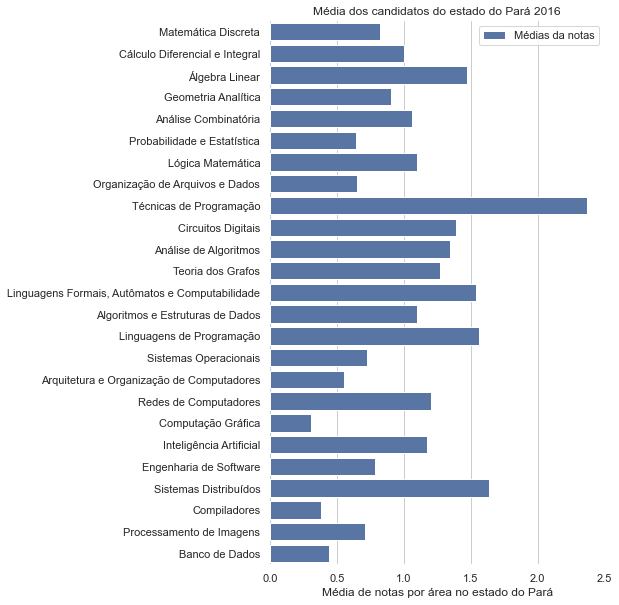

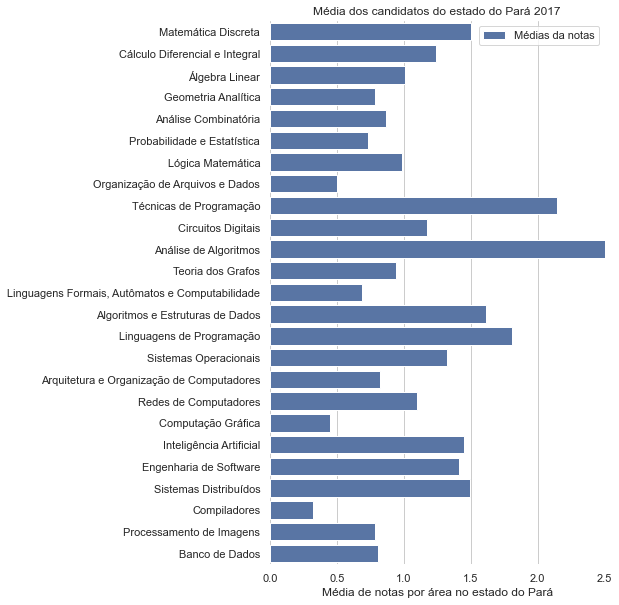

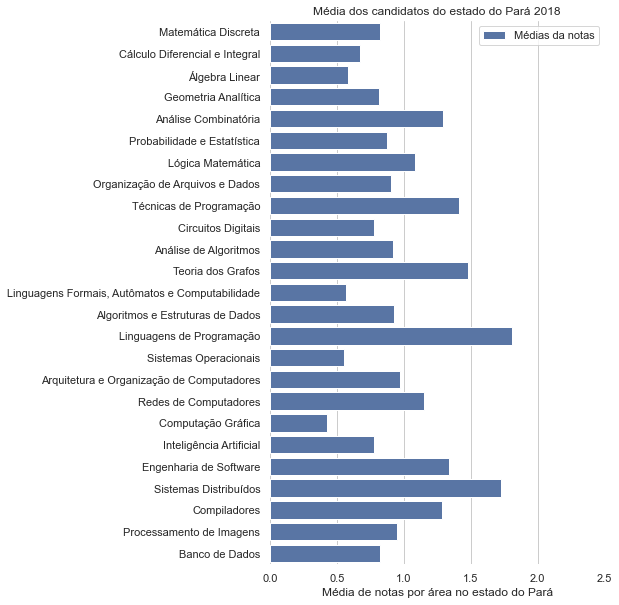

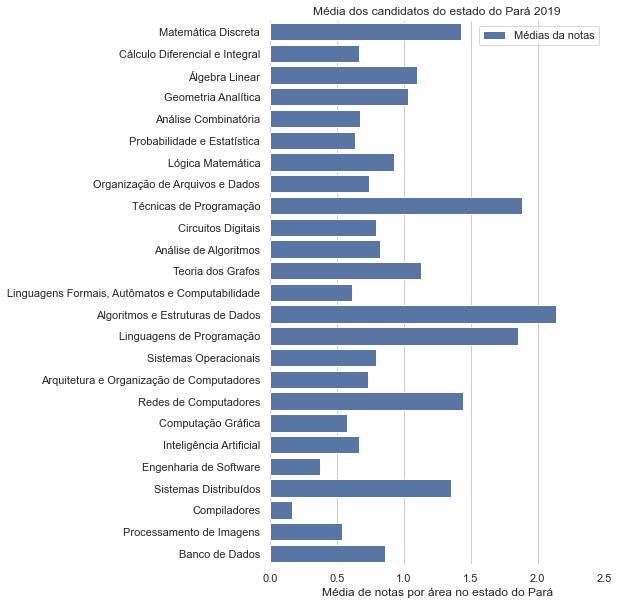

In [34]:
sns.set_theme(style="whitegrid")

for i in ano:
# Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 10))

    # Plot the total crashes
    #sns.set_color_codes("pastel")
    sns.barplot(y=grupo_ano.index, x=i, data=grupo_ano,
                label="Médias da notas", color="b")

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="best", frameon=True)
    texto_title = f'Média dos candidatos do estado do Pará {i}'
    ax.set_title(texto_title)
    ax.set(xlim=(0, 2.5), ylabel="",
        xlabel="Média de notas por área no estado do Pará")
    sns.despine(left=True, bottom=True)

#### Gráfico de desempenho dos candidatos do Pará

In [35]:
media_notasPA = dados_cand_NotasPA.mean().sort_values(ascending=False)

In [36]:
dadosMediaPA = pd.DataFrame(media_notasPA, columns=['Média'])

In [37]:
razao = np.arange(0.422383,1.981949)

In [38]:
razao.mean()

0.922383

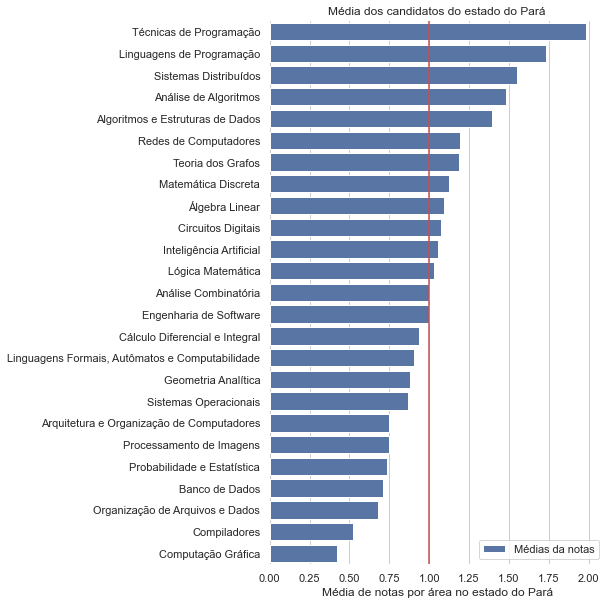

In [39]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(y=dadosMediaPA.index, x="Média", data=dadosMediaPA,
            label="Médias da notas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="best", frameon=True)
ax.set_title('Média dos candidatos do estado do Pará')
ax.set(xlim=(0, 2.1), ylabel="",
       xlabel="Média de notas por área no estado do Pará")
ax.axvline(1.0, color='r')
sns.despine(left=True, bottom=True)

#### Gráfico de desempenho dos candidatos nacional

In [40]:
dados_cand_NotasNacional = dados_candidatosNotas.copy()

In [41]:
dados_cand_NotasNacional = dados_cand_NotasNacional.drop(columns=['INSCRICAO', 'COD CARGO', 'CARGO', 'CÓD. ESPECIALIDADE','ANO', 'ESPECIALIDADE'])

In [42]:
media_notasNacional = dados_cand_NotasNacional.mean().sort_values(ascending=False)

In [43]:
dadosMediaNacional = pd.DataFrame(media_notasNacional, columns=['Média'])

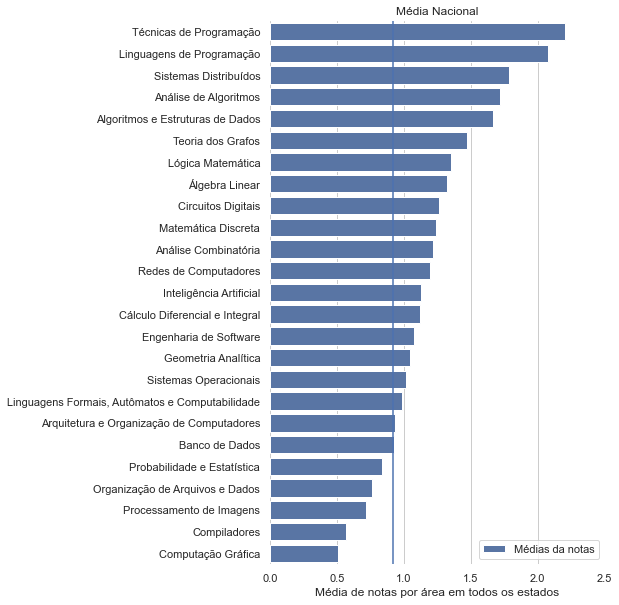

In [44]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(y=dadosMediaNacional.index, x="Média", data=dadosMediaNacional,
            label="Médias da notas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="best", frameon=True)
ax.set_title('Média Nacional')
ax.set(xlim=(0, 2.5), ylabel="",
       xlabel="Média de notas por área em todos os estados")
ax.axvline(0.922383)
sns.despine(left=True, bottom=True)

#### Gráfico de comparação entre o desempenho nacional e com estado do Pará

C:\Users\jeanc\AppData\Local\Temp\ipykernel_4628\1544708690.py:7: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\jeanc\AppData\Local\Temp\ipykernel_4628\1544708690.py:38: UserWarning:

FixedFormatter should only be used together with FixedLocator



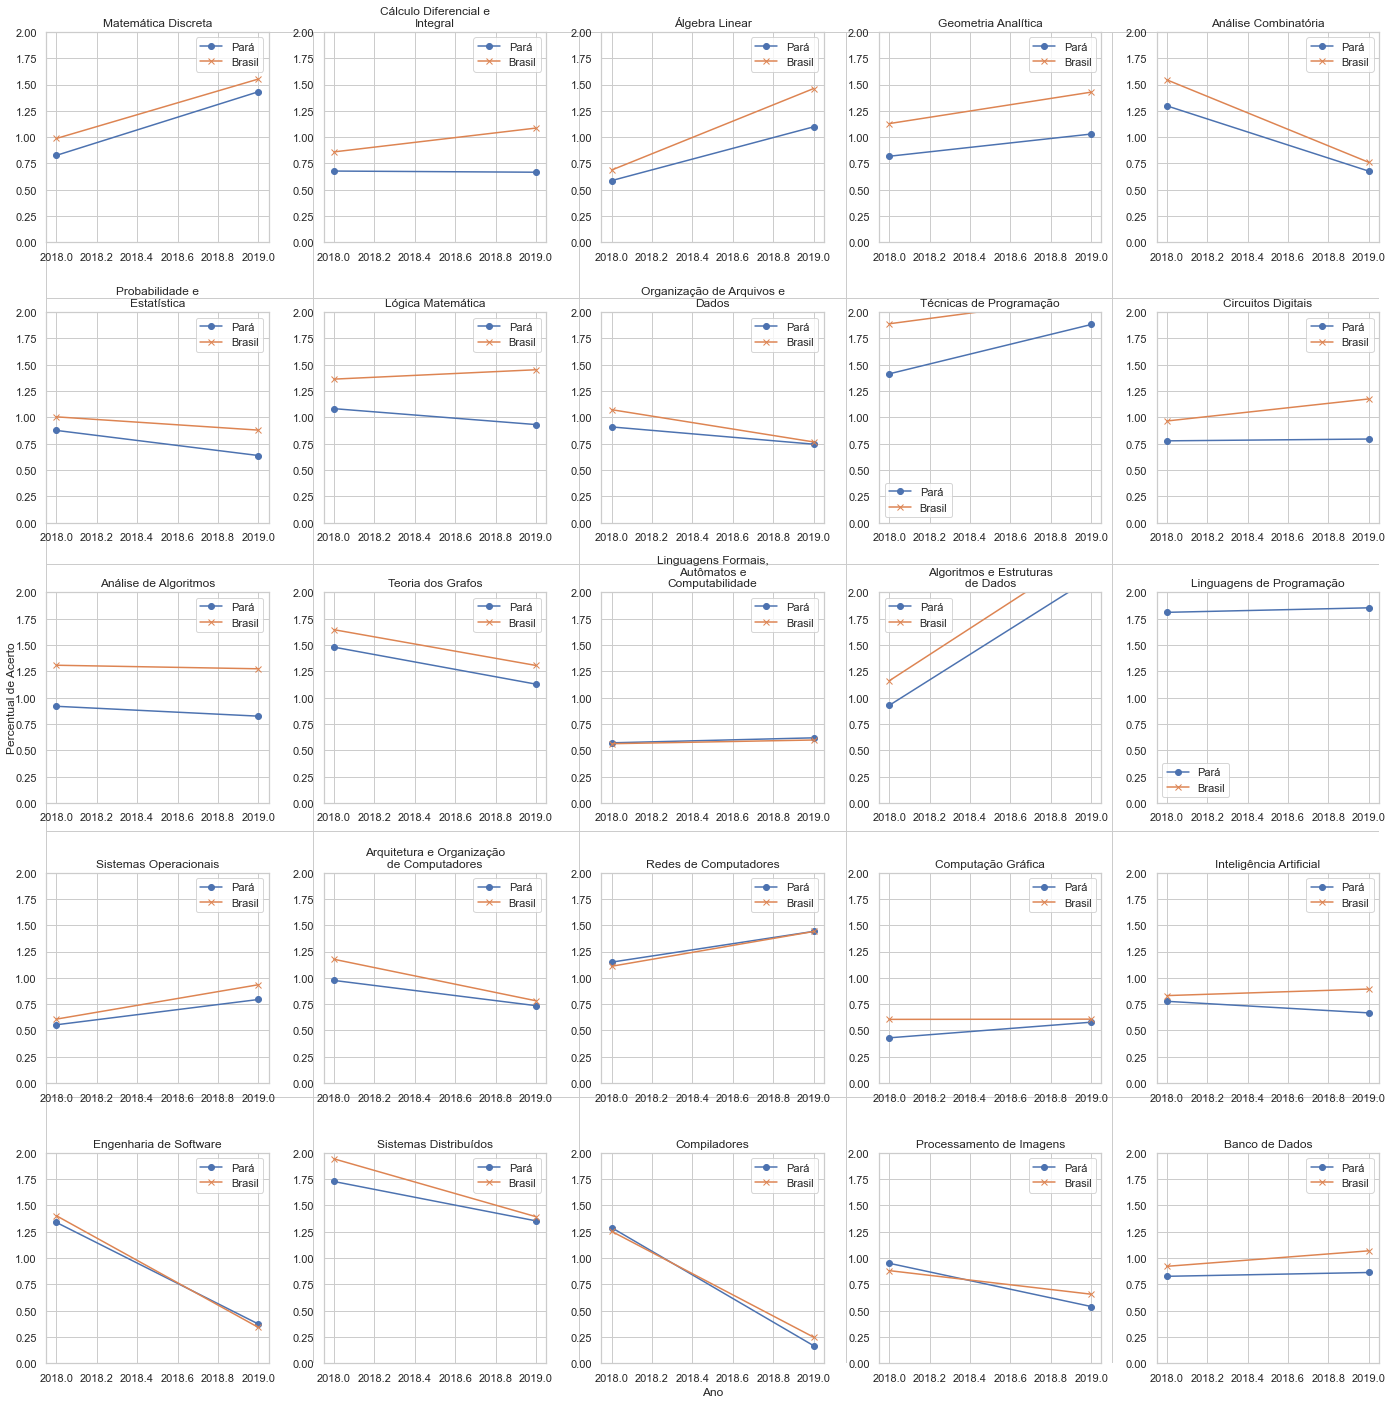

In [45]:
def get_last_two_scores(index, df):
    series = df.iloc[index]
    series = series.dropna()
    if series.shape[0] < 2:
        return None
    else:
        return series[-2:]
    
coordinates = []
for i in range(4):
    for j in range(4):
        coordinates.append((i, j))


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111) 
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Ano')
ax.set_ylabel('Percentual de Acerto')


coordinate_index = 1

if not grupo_ano.index.equals(grupo_ano_nacional.index):
    raise ValueError("Indexes should be the same on both dataframes")
for linhas in range(grupo_ano.shape[0]):
    data_course = get_last_two_scores(linhas, grupo_ano)
    if data_course is not None:
        data_br = get_last_two_scores(linhas, grupo_ano_nacional)
        ax1 = fig.add_subplot(5,5,coordinate_index)
        plt.plot(data_course, "-o", label="Pará")
        plt.plot(data_br, "-x", label="Brasil")
        ax1.set_title("\n".join(wrap(grupo_ano_nacional.index[linhas], 25)))
        ax.set_xticklabels(ano)
        plt.ylim(0,2)
        plt.legend()
        coordinate_index += 1
    else:
        pass
fig.tight_layout()
plt.show()

### Realizar estudos por Regiões do Brasil

In [55]:
dados_homologados_cp = dados_homologados.copy()

In [46]:
dados_homologados['ESTADO'].unique()

array(['OU', 'CE', 'RS', 'SP', 'PA', 'MT', 'AM', 'MS', 'PB', 'GO', 'RN',
       'PR', 'MG', 'SE', 'PE', 'ES', 'BA', 'RJ', 'AL', 'SC', 'MA', 'PI',
       'DF', 'RO', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [47]:
dados_notasRespostas.head()

INSCRICAO  COD CARGO               CARGO  CÓD. ESPECIALIDADE  \
0  39401673171-6          1  Mestrado/Doutorado               250.0   
1  39401645886-1          1  Mestrado/Doutorado               660.0   
2  39401663587-8          1  Mestrado/Doutorado               586.0   
3  39401651770-6          1  Mestrado/Doutorado               283.0   
4  39401671273-0          1  Mestrado/Doutorado               660.0   

                                     ESPECIALIDADE  Matemática Discreta  \
0                          Informática na Educação                  3.0   
1                             Teoria da Computação                  3.0   
2                             TEORIA DA COMPUTAÇÃO                  3.0   
3  Sistemas Distribuídos e Programação Concorrente                  0.0   
4                             Teoria da Computação                  1.0   

   Cálculo Diferencial e Integral  Álgebra Linear  Geometria Analítica  \
0                             3.0             3.0                  1.0   
1                             3.0             2.0                  0.0   
2                             2.0             3.0                  2.0   
3                             1.0             1.0                  1.0   
4                             0.0             1.0                  1.0   

   Análise Combinatória  ...  Arquitetura e Organização de Computadores  \
0                   2.0  ...                                        1.0   
1                   1.0  ...                                        1.0   
2                   2.0  ...                                        1.0   
3                   0.0  ...                                        1.0   
4                   0.0  ...                                        0.0   

   Redes de Computadores  Computação Gráfica  Inteligência Artificial  \
0                    1.0                 0.0                      2.0   
1                    1.0                 0.0                      1.0   
2                    2.0                 0.0                      2.0   
3                    1.0                 0.0                      2.0   
4                    2.0                 0.0                      1.0   

   Engenharia de Software  Sistemas Distribuídos  Compiladores  \
0                     0.0                    3.0           0.0   
1                     3.0                    2.0           1.0   
2                     1.0                    3.0           1.0   
3                     0.0                    2.0           0.0   
4                     1.0                    1.0           1.0   

   Processamento de Imagens  Banco de Dados   ANO  
0                       2.0             2.0  2016  
1                       1.0             1.0  2016  
2                       2.0             1.0  2016  
3                       2.0             1.0  2016  
4                       1.0             0.0  2016  

[5 rows x 31 columns]

In [48]:
import services.lista_estados_regioes as lesr

importing Jupyter notebook from C:\Users\jeanc\Documentos\Projeto de pesquisa mestrado\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [57]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dados_homologados_cp.loc[dados_homologados_cp['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [89]:
dados_homologados_cp1 = dados_homologados_cp.dropna()

In [90]:
dados_homologados_cp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14344 entries, 1 to 14572
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INSCRICAO       14344 non-null  object
 1   SEXO            14344 non-null  object
 2   CIDADE          14344 non-null  object
 3   ESTADO          14344 non-null  object
 4   CARGO           14344 non-null  object
 5   CÓDIGO          14344 non-null  int64 
 6   LOCAL DE PROVA  14344 non-null  object
 7   ANO             14344 non-null  int64 
 8   REGIAO          14344 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [84]:
grupo_regiao = dados_homologados_cp.groupby('REGIAO')

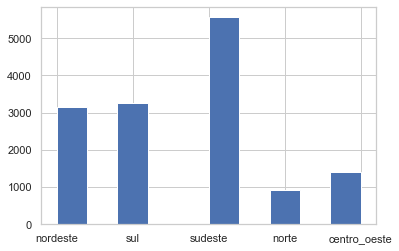

In [91]:
plt.hist(dados_homologados_cp1['REGIAO'])
plt.show()

### Dados das Respostas do POSCOMP 2016

In [49]:
dados_respostas = pd.read_csv('dados/respostas_poscomp/dados_respostas.csv', encoding='utf-8')

In [50]:
dados_respostas.head()

NÚMERO DE INSCRIÇÃO  SITUAÇÃO  1  2  3  4  5  6  7    8  ... 62 63 64 65  \
0          39401673171  Presente  E  A  B  D  A  A  C  NaN  ...  A  A  A  D   
1          39401645886  Presente  B  A  E  C  A  A  C    E  ...  A  C  A  E   
2          39401663587  Presente  E  A  B  D  A  A  C    D  ...  A  A  A  E   
3          39401651770  Presente  E  E  D  B  D  B  D    D  ...  A  E  E  E   
4          39401671273  Presente  B  A  D  C  E  D  B    D  ...  E  E  A  E   

  66 67   68 69 70   ANO  
0  C  A  NaN  B  D  2016  
1  C  C    C  C  A  2016  
2  C  A    C  B  D  2016  
3  C  A    B  B  C  2016  
4  C  C    C  A  D  2016  

[5 rows x 73 columns]

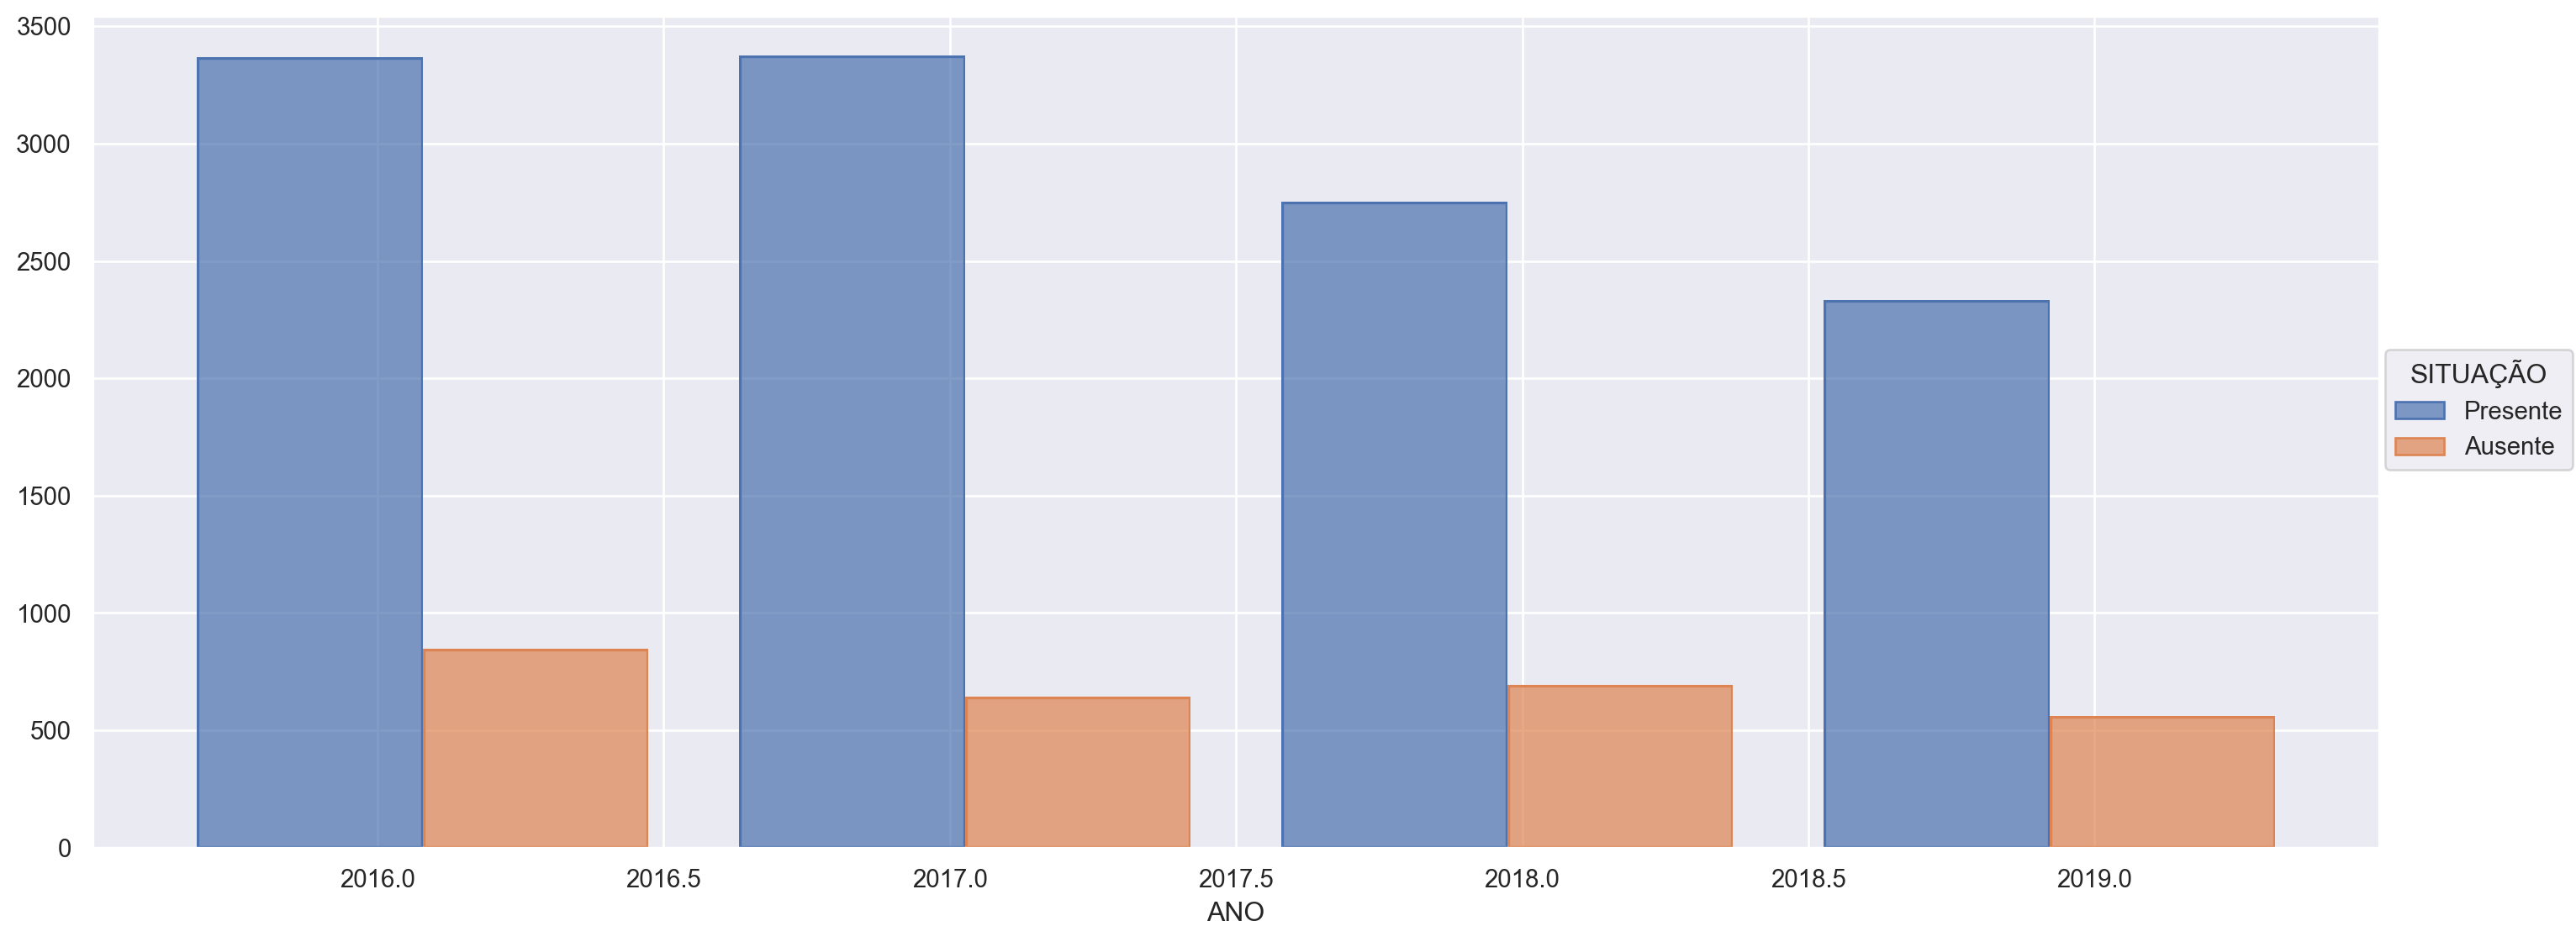

In [51]:
ano = ['2016', '2017', '2018', '2019']
so.Plot(dados_respostas, x='ANO', color="SITUAÇÃO").add(so.Bar(width=5), so.Hist(), so.Dodge()).layout(size=(15, 6))

### Salvar os dados

In [52]:
#dados_homologados.to_csv('dados/homologação_poscomp/dados_homologacao_PROCESSADA.csv')

In [53]:
#dados_notasRespostas.to_csv('dados/notas_poscomp/dados_notasRespostas.csv')